# ERA5 hourly data on single levels from 1940 to present

This Jupyter notebook is part of a series of examples which explore how to easily access, process and visualise climate datasets from the [Copernicus Climate Data Store] (CDS). Throughout these examples, we will be using the earthkit ecosystem of Python libraries, which are designed to greatly simplify and reduce the code you need to write to work with earth science data.

In this notebook, we will learn how to access and visualise data from the [Copernicus Climate Data Store](https://cds.climate.copernicus.eu/#!/home) (CDS) dataset **[ERA5 hourly data on single levels from 1940 to present](https://cds.climate.copernicus.eu/datasets/reanalysis-era5-single-levels?tab=overview)**.

We will use the following earthkit Python packages:
- earthkit.data: for accessing the ERA5 dataset in the CDS;
- earthkit.plots: for visualising the data we retrieve on a map.

**If this is you first time working with earthkit, you can find a quick start guide and installation instructions on the [earthkit website](https://earthkit.readthedocs.io/en/latest/).**

In [1]:
import earthkit

## Retrieving CDS data with earthkit

Datasets in the CDS can be easily accessed using `earthkit.data`.

The function `earthkit.data.from_source()` offers a versatile way to retrieve data from a variety of sources, including local files, web-based storage, and directly from the Climate Data Store. To access data from the CDS using this function, you will need to provide three key arguments:
- The `source` of the data: Specify `'cds'` to indicate that the data will be fetched from the CDS.
- The name of the `dataset`: In this notebook, that's 'reanalysis-era5-single-levels'.
- The payload of the `request`: This includes the necessary parameters to retrieve a specific part of the dataset.

For more information about `earthkit.data`, including a full user guide, see its [documentation](https://earthkit-data.readthedocs.io/en/latest/).

<div style="padding: 20px; background-color: #D4E5F7; border-left: 6px solid #006EAD; margin-bottom: 15px; width: 95%;">
    <strong>Note</strong>: Accessing CDS data requires a CDS account and a <code>.cdsapirc</code> configuration file on your machine. If you have previously used the CDS API, it is likely you have already completed this setup. If not, you should consult the <a href='https://cds-beta.climate.copernicus.eu/how-to-api'>CDS API user guide</a> for instructions on how to proceed.
</div>

In this example, let's access some ERA5 global 2m temperature and mean sea level pressure from the 1st of May 2024 at midnight UTC.

If you would like to experiment with different parts of the dataset, the easiest way to do this is via the [interactive download form for ERA5 in the CDS](https://cds.climate.copernicus.eu/datasets/reanalysis-era5-single-levels?tab=download). Once you have made your selection, click the "Show API request code" button at the bottom of the page to get a CDS API request for this dataset.
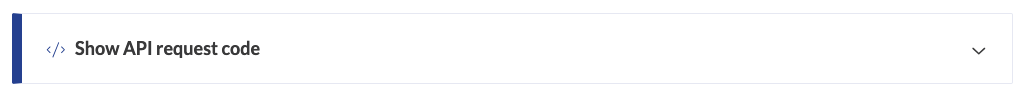
You'll want to copy just the `dataset` and `request` portions from this code, which can be passed directly into `earthkit.data.from_source()` in the cell below.

In [2]:
source = 'cds'
dataset = 'reanalysis-era5-single-levels'
request = {
    'product_type': 'reanalysis',
    'variable': ['2m_temperature', 'mean_sea_level_pressure'],
    'year': '2024',
    'month': '05',
    'day': '01',
    'time': '00:00',
}

data = earthkit.data.from_source(source, dataset, request)

2025-05-02 15:52:41,486 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-05-02 15:52:41,486 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.


The resulting `data` object provides many convenient tools for working with your downloaded data. You could call `data.save()` to save your downloaded data file to disk, or `to_xarray()`, `to_numpy()` or `to_pandas()` to get your data into a Python data structure that you're familiar with.

Let's take a look at the data we've just downloaded by converting it to an xarray `Dataset`:

In [3]:
data.to_xarray()

<xarray.Dataset> Size: 17MB
Dimensions:    (latitude: 721, longitude: 1440)
Coordinates:
  * latitude   (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
Data variables:
    2t         (latitude, longitude) float64 8MB ...
    msl        (latitude, longitude) float64 8MB ...
Attributes:
    class:        ea
    stream:       oper
    levtype:      sfc
    type:         an
    expver:       0001
    date:         20240501
    time:         0
    domain:       g
    number:       0
    Conventions:  CF-1.8
    institution:  ECMWF

## Generating a simple image

We can visualise the data we have just retrieved from the CDS simply and conveniently with `earthkit.plots`. We will also use the [cartopy](https://scitools.org.uk/cartopy/docs/latest/) library to make use of a suitable map projection for this data. 

In [4]:
import earthkit.plots
import cartopy.crs as ccrs

`earthkit.plots` leverages the power of the earthkit ecosystem to make producing publication-quality scientific graphics simple and convenient. It is built on top of well-established Python libraries like [matplotlib](https://matplotlib.org/) and [cartopy]((https://scitools.org.uk/cartopy/docs/latest/)), and helps reduce boilerplate code with a very high-level API and a wealth of domain-specific knowledge to provide features like:

- Shortcuts and convenience methods which reduce the amount of code you need to write to produce a high-quality visualisation
- Formatting of titles and labels using templates which understand a wide range of common metadata standards
- Creating and swapping out style libraries based on your organisation, project or personal choice
- Automatic styling of data variables based on metadata detection, including unit detection and conversion
- Visualisation support for a wide range of grid types, including HEALPix, octahedral and more.

For more information about `earthkit.plots`, including a user guide, see its [documentation](https://earthkit-plots.readthedocs.io/en/latest/index.html).

In this example, we will recreate the overview image for the *ERA5 hourly data on single levels from 1940 to present* dataset in the CDS using `earthkit.plots`.

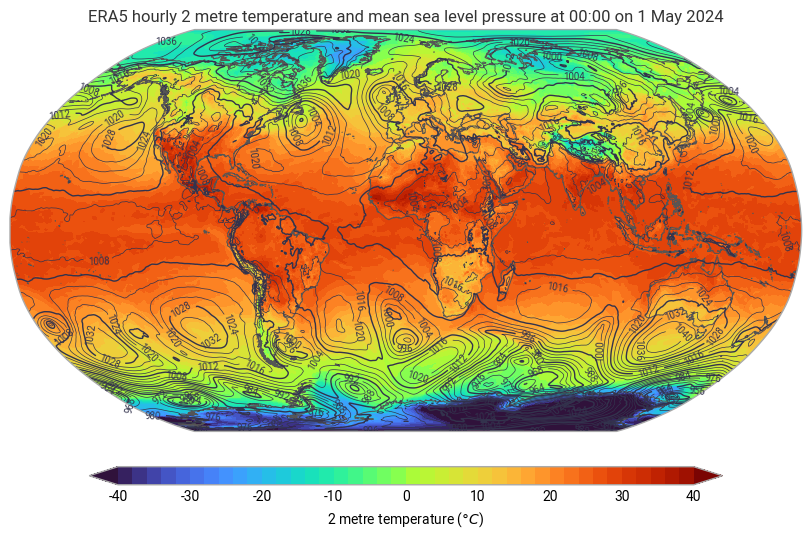

In [6]:
# Add a map to the figure using the Robinson projection
chart = earthkit.plots.Map(crs=ccrs.Robinson())

# Plot the temperature and pressure data with our preferred units
# The plotting styles come from a style library, and are chosen
# based on the source data's metadata
temperature, pressure = data
chart.quickplot(temperature, units="celsius")
chart.quickplot(pressure, units="hPa")

# Add coastlines and a legend
chart.coastlines()
chart.legend()

# Add a title, using format strings which extract metadata from
# the source data
chart.title(
    "ERA5 hourly {variable_name!l} "
    "at {time:%H:%M} on {time:%-d %B %Y}"
)

chart.show()